# 1. importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                cartopy_xlim, cartopy_ylim, interpline, CoordPair)

# 2. Downloading Data

In [2]:
ncfile = Dataset("wrf_ysu_24112020_06.nc")
# print(ncfile)

# 3. Extract Variables

In [3]:
# Define the cross section lat long
cros_start = CoordPair(lat=47.68, lon=16.69)
cros_end = CoordPair(lat=47.41, lon=21.98)

#Get the WRF variables
ht = getvar(ncfile,"z")#,timeidx=52)
ter = getvar(ncfile,"ter")#,timeidx=52)
# print(ht)

# cloud mixing ratio
lwc = getvar(ncfile,"QCLOUD")#,timeidx=52)


In [4]:
# compute the vertical cross-section interpolation. Also inclued the lat/long points alongs the 
# cross-section in the metadata by setting lat long to true
z_cros = vertcross(lwc,ht,wrfin=ncfile,
                  start_point=cros_start,
                  end_point=cros_end,
                  latlon=True,
                  meta=True)

# make a copy of the z_cross data. Lets use regular numpy array for this
dbz_cros_filled = np.ma.copy(to_np(z_cros))
print(dbz_cros_filled.shape[-1])

199


In [5]:
# for each cross section coloumn find the first index 
#with non-missing values and copy these to the missing elements below
for i in range(dbz_cros_filled.shape[-1]):
    column_vals = dbz_cros_filled[:,i]
    first_idx = int(np.transpose((column_vals > -10).nonzero())[0])
    dbz_cros_filled[0:first_idx,i] = dbz_cros_filled[first_idx,i]
print(dbz_cros_filled.shape)
    
# get the terrain height along with the cross-section
ter_line = interpline(ter,wrfin=ncfile, start_point=cros_start,
                     end_point=cros_end)

# get the lat lon points
lats, lons = latlon_coords(lwc)

# get the projection 
cart_proj = get_cartopy(lwc)

# z_cros.plot()
# plt.show()

(100, 199)


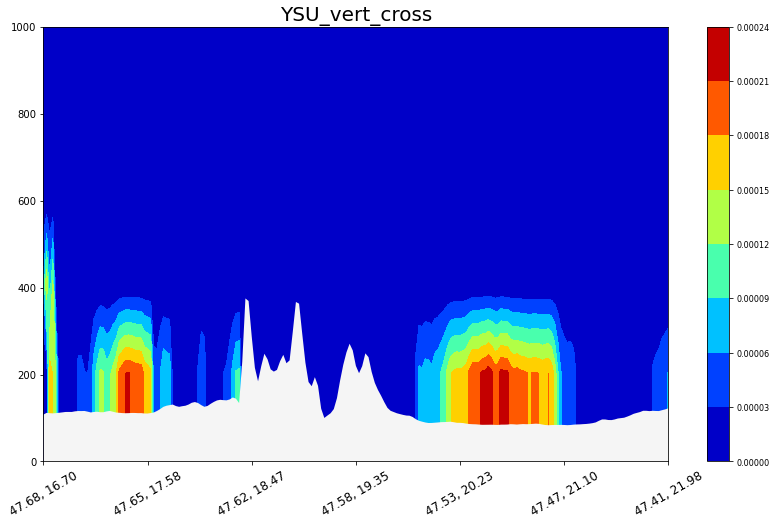

In [6]:
# creating figure
fig = plt.figure(figsize=(14,8))
ax_cros = plt.axes()

xs = np.arange(0,z_cros.shape[-1],1)
ys = to_np(z_cros.coords["vertical"])
lwc_countours = ax_cros.contourf(xs,ys,to_np(dbz_cros_filled),
                                cmap = "jet")

cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
cb_lwc.ax.tick_params(labelsize=8)

#filling the mountain area
ht_fill = ax_cros.fill_between(xs,0,to_np(ter_line),
                              facecolor="whitesmoke")

#set the s-ticks to use latititude and longitude
coord_pairs = to_np(z_cros.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]

#set the desired number of xticks below
num_ticks = 6
thin = int((len(x_ticks)/num_ticks)+0.5)
# print(x_labels[::thin])
ax_cros.set_xticks(x_ticks[::thin])
ax_cros.set_xticklabels(x_labels[::thin], rotation=30, fontsize=12)

# set the range of y-axis
ax_cros.set_ylim([0,1000])

# add title 
ax_cros.set_title("YSU_vert_cross",{"fontsize" :20})
plt.savefig("YSU_vert_cross.png",dpi=240) 
plt.show()

In [7]:
import numpy as np

arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print(arr.shape[-1])

4
